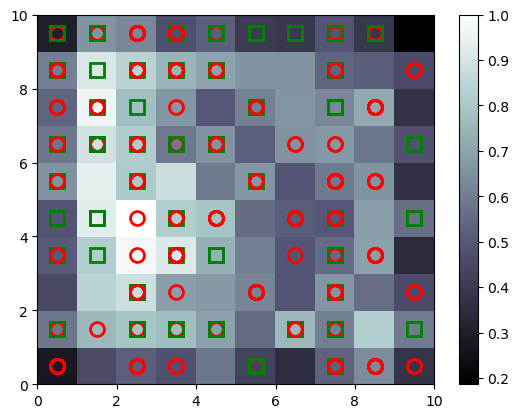

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [4]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,3)], mappings[(2,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [5]:
customers = dataset.iloc[:, 1:].values